## Tableau Map Detail

In [2]:
# Replacement cell — Tableau Map Detail (imports + safe connection + query + export)
import os
import sqlite3
import pandas as pd

# Path to your sqlite DB (update if different)
sqlite_db = r"C:\Users\leonb\Downloads\swiss_real_estate.db"
export_csv = r"C:\Users\leonb\Downloads\q1_property_gross_yield.csv"

# Ensure DB exists (helpful message if not)
if not os.path.exists(sqlite_db):
    raise FileNotFoundError(f"SQLite DB not found at: {sqlite_db}\nPlease run the cell that creates it (cell #4).")

# Ensure we have a connection object (reuse if present)
try:
    conn
except NameError:
    conn = sqlite3.connect(sqlite_db)

# --- Query (properly triple-quoted) ---
q1 = """
SELECT
  ROWID AS Property_ID,
  "Location",
  "Property_Price",
  "Annual Rental Income" AS Annual_Rental_Income,
  CASE
    WHEN "Property_Price" IS NULL OR "Property_Price" = 0 THEN NULL
    ELSE ROUND(("Annual Rental Income" * 100.0 / "Property_Price"), 2)
  END AS Gross_Rental_Yield_Percent
FROM Swiss_real_estate_property;
"""

# Run the query, show a preview, and export to CSV
try:
    df_q1 = pd.read_sql_query(q1, conn)
    display(df_q1.head(10))
    df_q1.to_csv(export_csv, index=False, encoding="utf-8-sig")
    print(f"✅ Query ran successfully. Exported to: {export_csv} (rows: {len(df_q1)})")
except Exception as e:
    print("❌ Error while running query or exporting:", e)



,Property_ID,Location,Property_Price,Annual_Rental_Income,Gross_Rental_Yield_Percent
0,1,"Bernstrasse 217, 3000 Bern",900000.0,32400,3.6
1,2,"Röttelerstrasse 2, 4058 Basel",1150000.0,46000,4.0
2,3,"Riedackerstrasse 11, 8051 Zürich",1550000.0,54250,3.5
3,4,"Probusweg 2, 8057 Zürich",2260000.0,79100,3.5
4,5,"Limmattalstrasse 281, 8049 Zürich",1960000.0,68600,3.5
5,6,"Limmattalstrasse 281, 8049 Zürich",1510000.0,52850,3.5
6,7,"Birchdörfli 50, 8050 Zürich",1650000.0,57750,3.5
7,8,"Weingartenweg 2 & 4, 8049 Zürich",2480000.0,86800,3.5
8,9,"Mittlere Strasse 148, 4056 Basel",2230000.0,89200,4.0
9,10,6006 Luzern,3850000.0,146300,3.8


✅ Query ran successfully. Exported to: C:\Users\leonb\Downloads\q1_property_gross_yield.csv (rows: 794)


In [3]:
# q2 City-level Overall Gross Rental Yield = """
SELECT
  "Location",
  SUM("Annual Rental Income") AS Total_Annual_Rental_Income,
  SUM("Property_Price") AS Total_Property_Price,
  CASE WHEN SUM("Property_Price") = 0 OR SUM("Property_Price") IS NULL THEN NULL
       ELSE ROUND(SUM("Annual Rental Income") * 100.0 / SUM("Property_Price"), 2) END
    AS Overall_Gross_Rental_Yield_Percent
FROM Swiss_real_estate_property
GROUP BY "Location"
ORDER BY Overall_Gross_Rental_Yield_Percent DESC;
"""
df_q2 = pd.read_sql_query(q2, conn)
df_q2.to_csv(r"C:\Users\leonb\Downloads\q2_city_gross_yield.csv", index=False, encoding="utf-8-sig")
display(df_q2.head(50))


,Location,Total_Annual_Rental_Income,Total_Property_Price,Overall_Gross_Rental_Yield_Percent
0,"Mädergutstrasse 35, 3018 Bern",69760.0,365000.0,19.11
1,"Rue du Sablé 22, 4055 Basel",198000.0,1049000.0,18.88
2,"Eichenstrasse 10, 6015 Luzern",98000.0,525000.0,18.67
3,"Offenburgerstrasse 52, 4057 Basel",115200.0,620000.0,18.58
4,"Wasgenring, 4055 Basel",90000.0,620000.0,14.52
5,"Mühlackerstrasse 113, 8046 Zürich",180000.0,1400000.0,12.86
6,"Wasgenring 55, 4055 Basel",62700.0,499000.0,12.57
7,"Talbächliweg 18, 8048 Zürich",121600.0,970000.0,12.54
8,"Moosmattstrasse 23, 6005 Luzern",88800.0,750000.0,11.84
9,"Mühledorfstrasse 1, 3018 Bern",89040.0,835000.0,10.66


In [8]:
# Replacement cell — q3: Per-property Net Rental Yield (after 10% operating costs)
import os
import sqlite3
import pandas as pd

# Paths (update if you used a different path)
sqlite_db = r"C:\Users\leonb\Downloads\swiss_real_estate.db"
export_csv = r"C:\Users\leonb\Downloads\q3_property_net_yield.csv"

# Ensure DB exists
if not os.path.exists(sqlite_db):
    raise FileNotFoundError(f"SQLite DB not found at: {sqlite_db}\nPlease run the cell that creates it (cell #4).")

# Ensure connection object (reuse if already present)
try:
    conn
except NameError:
    conn = sqlite3.connect(sqlite_db)

# SQL query as a plain triple-quoted string (no indentation issues)
q3 = """
SELECT
  ROWID AS Property_ID,
  "Location",
  "Property_Price",
  "Annual Rental Income",
  ROUND(("Annual Rental Income" - ("Property_Price" * 0.10)), 2) AS Net_Income,
  CASE
    WHEN "Property_Price" IS NULL OR "Property_Price" = 0 THEN NULL
    ELSE ROUND((("Annual Rental Income" - ("Property_Price" * 0.10)) * 100.0 / "Property_Price"), 2)
  END AS Net_Rental_Yield_Percent
FROM Swiss_real_estate_property;
"""

# Run, display and export
try:
    df_q3 = pd.read_sql_query(q3, conn)
    if df_q3.empty:
        print(" Query returned 0 rows. Check that the table has data and column names match.")
        # show available columns to help debug
        info_df = pd.read_sql_query("PRAGMA table_info('Swiss_real_estate_property');", conn)
        print("Table columns:")
        display(info_df)
    else:
        display(df_q3.head(10))
        df_q3.to_csv(export_csv, index=False, encoding="utf-8-sig")
        print(f" Exported q3 results to: {export_csv} (rows: {len(df_q3)})")
except Exception as e:
    print(" Error while running q3 or exporting:", e)


,Property_ID,Location,Property_Price,Annual Rental Income,Net_Income,Net_Rental_Yield_Percent
0,1,"Bernstrasse 217, 3000 Bern",900000.0,32400,-57600.0,-6.4
1,2,"Röttelerstrasse 2, 4058 Basel",1150000.0,46000,-69000.0,-6.0
2,3,"Riedackerstrasse 11, 8051 Zürich",1550000.0,54250,-100750.0,-6.5
3,4,"Probusweg 2, 8057 Zürich",2260000.0,79100,-146900.0,-6.5
4,5,"Limmattalstrasse 281, 8049 Zürich",1960000.0,68600,-127400.0,-6.5
5,6,"Limmattalstrasse 281, 8049 Zürich",1510000.0,52850,-98150.0,-6.5
6,7,"Birchdörfli 50, 8050 Zürich",1650000.0,57750,-107250.0,-6.5
7,8,"Weingartenweg 2 & 4, 8049 Zürich",2480000.0,86800,-161200.0,-6.5
8,9,"Mittlere Strasse 148, 4056 Basel",2230000.0,89200,-133800.0,-6.0
9,10,6006 Luzern,3850000.0,146300,-238700.0,-6.2


✅ Exported q3 results to: C:\Users\leonb\Downloads\q3_property_net_yield.csv (rows: 794)


In [11]:
# Replacement cell — q4: City-Level Average ROI (Net + 3% appreciation)
import os
import sqlite3
import pandas as pd

# Paths (update if you used a different path)
sqlite_db = r"C:\Users\leonb\Downloads\swiss_real_estate.db"
export_csv = r"C:\Users\leonb\Downloads\q4_city_avg_roi.csv"

# Ensure DB exists
if not os.path.exists(sqlite_db):
    raise FileNotFoundError(f"SQLite DB not found at: {sqlite_db}\nPlease run the cell that creates it (cell #4).")

# Ensure connection object (reuse if already present)
try:
    conn
except NameError:
    conn = sqlite3.connect(sqlite_db)

# SQL query as a clean triple-quoted string (no extra leading indentation)
q4 = """
SELECT
  "Location",
  COUNT(*) AS Num_Properties,
  ROUND(
    AVG(
      CASE
        WHEN "Property_Price" IS NULL OR "Property_Price" = 0 THEN NULL
        ELSE (
          ( ("Annual Rental Income" - ("Property_Price" * 0.10)) + ("Property_Price" * 0.03) )
          * 100.0 / "Property_Price"
        )
      END
    ), 2
  ) AS Avg_Overall_ROI_Percent
FROM Swiss_real_estate_property
GROUP BY "Location"
ORDER BY Avg_Overall_ROI_Percent DESC;
"""

# Run, display and export
try:
    df_q4 = pd.read_sql_query(q4, conn)
    if df_q4.empty:
        print(" Query returned 0 rows. Check that the table has data and column names match.")
        info_df = pd.read_sql_query("PRAGMA table_info('Swiss_real_estate_property');", conn)
        print("Table columns:")
        display(info_df)
    else:
        display(df_q4.head(30))
        df_q4.to_csv(export_csv, index=False, encoding="utf-8-sig")
        print(f" Exported q4 results to: {export_csv} (rows: {len(df_q4)})")
except Exception as e:
    print(" Error while running q4 or exporting:", e)


,Location,Num_Properties,Avg_Overall_ROI_Percent
0,4054 Basel,4,13.66
1,"Mädergutstrasse 35, 3018 Bern",1,12.11
2,"Rue du Sablé 22, 4055 Basel",1,11.88
3,"Eichenstrasse 10, 6015 Luzern",1,11.67
4,"Offenburgerstrasse 52, 4057 Basel",1,11.58
5,"Wasgenring, 4055 Basel",1,7.52
6,"Mühlackerstrasse 113, 8046 Zürich",1,5.86
7,"Wasgenring 55, 4055 Basel",1,5.57
8,"Talbächliweg 18, 8048 Zürich",1,5.54
9,"Moosmattstrasse 23, 6005 Luzern",1,4.84


 Exported q4 results to: C:\Users\leonb\Downloads\q4_city_avg_roi.csv (rows: 374)


,Location,Avg_Property_Price,Num_Properties
0,"Rue de l'Athénée 36, 1206 Genf",2.280000e+08,1
1,"Athénée,Marignac,Contamines, 1206 Genève",2.280000e+08,1
2,"1205 Geneva, Switzerland",3.500000e+07,1
3,"Avenue de Budé 0, 1206 Genf",3.108600e+07,1
4,"Privatstrasse, 8038 Zürich",2.000000e+07,1
5,8037 Zürich,1.550000e+07,1
6,"Aarbergergasse 12, 3011 Bern",7.700000e+06,1
7,"Rue des Granges 16, 1204 Genève",7.117500e+06,4
8,8038 Zürich,7.113333e+06,3
9,"Freiestrasse 54 + 54a, 3012 Bern",6.900000e+06,1


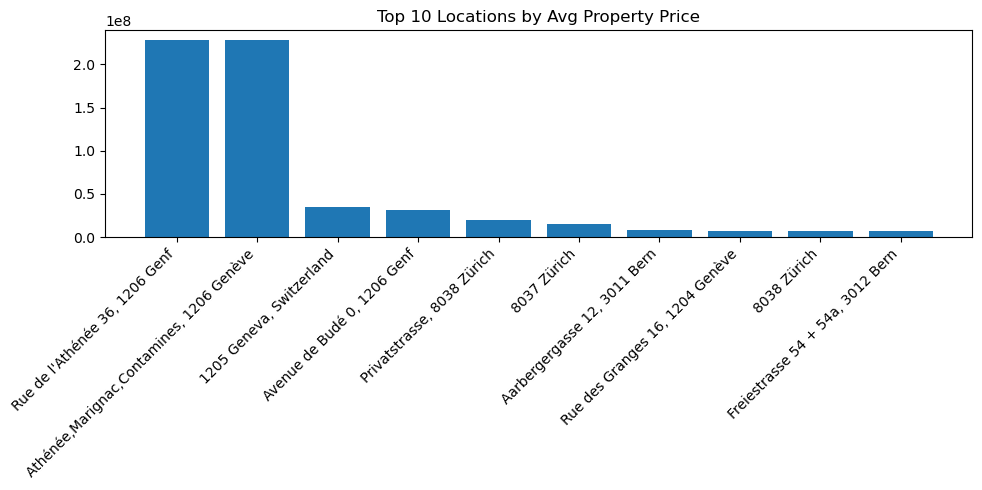

In [16]:
# q5 Top 10 Locations by Average Property Price

q5 = """
SELECT
  "Location",
  ROUND(AVG("Property_Price"), 2) AS Avg_Property_Price,
  COUNT(*) AS Num_Properties
FROM Swiss_real_estate_property
GROUP BY "Location"
ORDER BY Avg_Property_Price DESC
LIMIT 10;
"""

df_q5 = pd.read_sql_query(q5, conn)
df_q5.to_csv(r"C:\Users\leonb\Downloads\q5_top10_by_avg_price.csv", index=False, encoding="utf-8-sig")
display(df_q5)

# Simple matplotlib bar (not specifying colors)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(df_q5['Location'], df_q5['Avg_Property_Price'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Locations by Avg Property Price')
plt.tight_layout()
plt.show()

In [18]:
# Capital Appreciation Potential (5-year) per property
q6 = """
SELECT
  ROWID AS Property_ID,
  "Location",
  "Property_Price",
  ROUND("Property_Price" * (1.03 * 1.03 * 1.03 * 1.03 * 1.03), 2) AS Estimated_Future_Price_5_Years,
  ROUND((( (1.03 * 1.03 * 1.03 * 1.03 * 1.03) - 1) * 100.0), 2) AS Capital_Appreciation_Potential_Percent
FROM Swiss_real_estate_property;
"""
df_q6 = pd.read_sql_query(q6, conn)
df_q6.to_csv(r"C:\Users\leonb\Downloads\q6_capital_appreciation.csv", index=False, encoding="utf-8-sig")
display(df_q6.head())

,Property_ID,Location,Property_Price,Estimated_Future_Price_5_Years,Capital_Appreciation_Potential_Percent
0,1,"Bernstrasse 217, 3000 Bern",900000.0,1043346.67,15.93
1,2,"Röttelerstrasse 2, 4058 Basel",1150000.0,1333165.19,15.93
2,3,"Riedackerstrasse 11, 8051 Zürich",1550000.0,1796874.82,15.93
3,4,"Probusweg 2, 8057 Zürich",2260000.0,2619959.41,15.93
4,5,"Limmattalstrasse 281, 8049 Zürich",1960000.0,2272177.19,15.93
